### 라이브러리 불러오기

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

### 데이터 가져오기

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

BATCH_SIZE=128
EPOCHS=2000
Z_DIMENSIONS=32
data = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))

### 판별자 신경망 구축

In [3]:
def make_discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', 
	activation='relu', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', 
	activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same', 
	activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    return model

### 판별자 생성 및 컴파일

In [4]:
discriminator = make_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(lr=0.0004),
                      metrics=['accuracy'])

### 생성자 신경망 구축

In [5]:
def make_generator():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(7*7*64, input_shape=(Z_DIMENSIONS,)))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Reshape((7, 7, 64)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2DTranspose(32,
                            kernel_size=5, padding='same',
                            activation=None,))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2DTranspose(16,
                            kernel_size=5, padding='same',
                            activation=None,))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2D(1, kernel_size=5, padding='same',
                   activation='sigmoid'))
    return model

### 생성자 생성 및 훈련되지 않은 이미지 생성

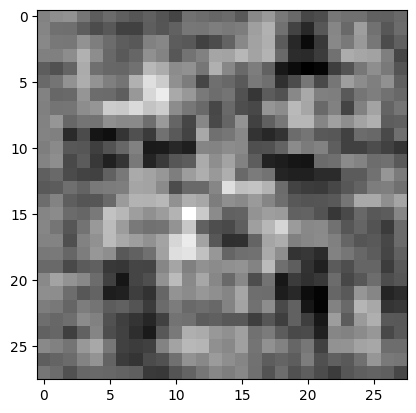

In [6]:
generator = make_generator()

noise = tf.random.normal([1, Z_DIMENSIONS])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.show()

### 생성적 적대 신경망 구축

In [7]:
z = tf.keras.layers.Input(shape=(Z_DIMENSIONS,))
fake_image = generator(z)
discriminator.trainable = False
prediction = discriminator(fake_image)
gan_model = tf.keras.models.Model(z, prediction)

### GAN 모델 컴파일

In [8]:
gan_model.compile(loss='binary_crossentropy',
                          optimizer=tf.keras.optimizers.Adam(lr=0.0004),
                          metrics=['accuracy'])

### GAN 학습

1/1 [==============================] - 0s 133ms/step


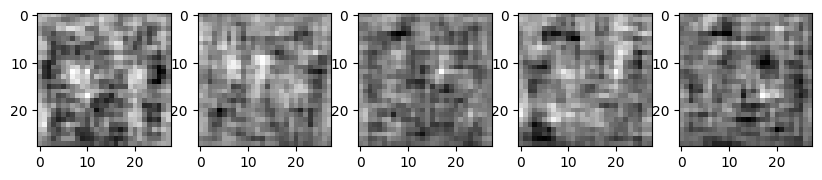

1/1 [==============================] - 0s 30ms/step


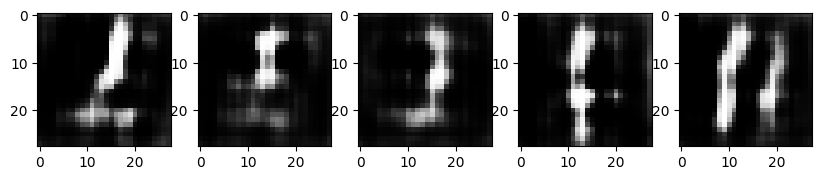

1/1 [==============================] - 0s 31ms/step


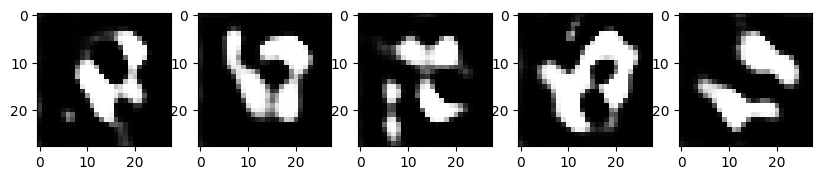

1/1 [==============================] - 0s 33ms/step


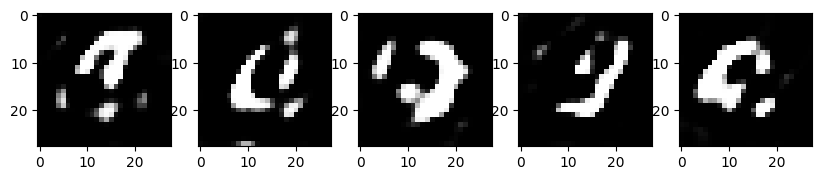

1/1 [==============================] - 0s 29ms/step


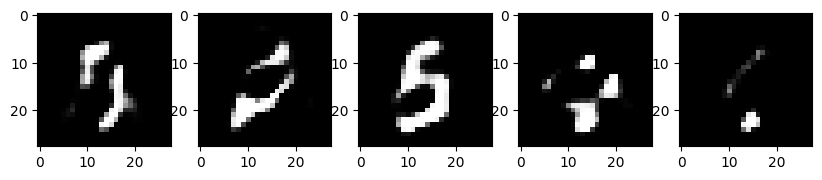

1/1 [==============================] - 0s 31ms/step


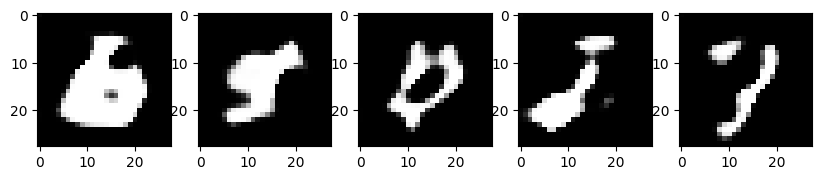

1/1 [==============================] - 0s 30ms/step


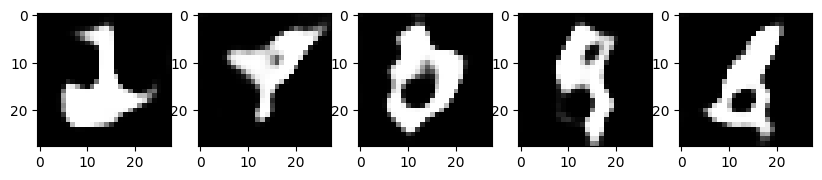

1/1 [==============================] - 0s 32ms/step


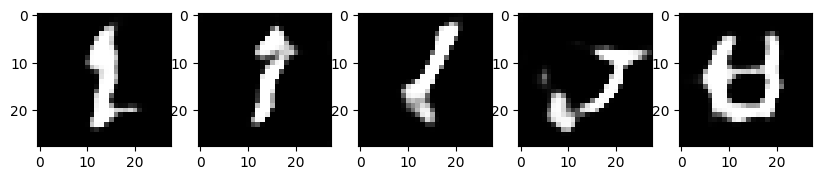

1/1 [==============================] - 0s 30ms/step


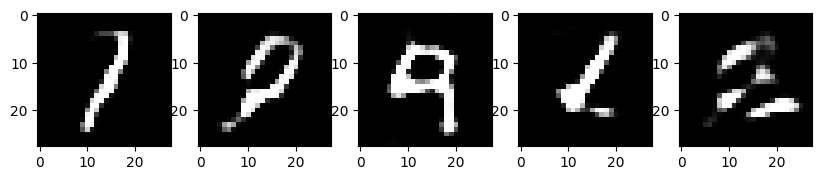

1/1 [==============================] - 0s 31ms/step


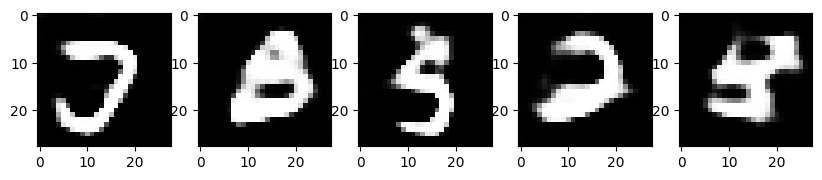

1/1 [==============================] - 0s 27ms/step


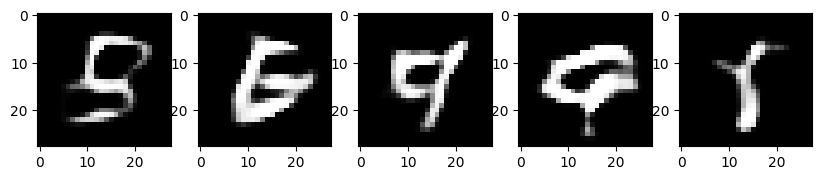

1/1 [==============================] - 0s 29ms/step


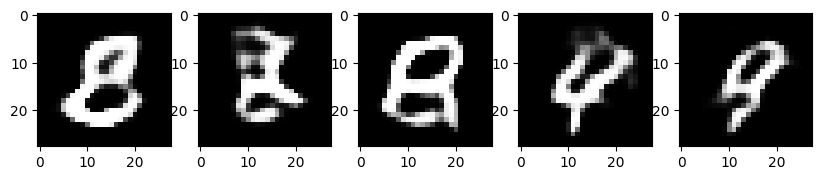

1/1 [==============================] - 0s 37ms/step


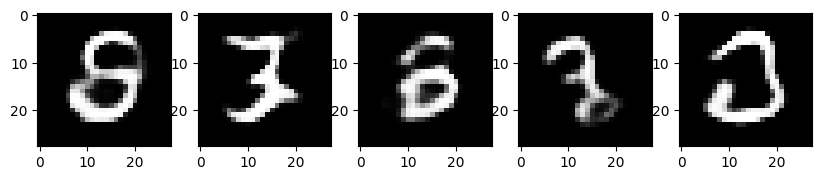

1/1 [==============================] - 0s 31ms/step


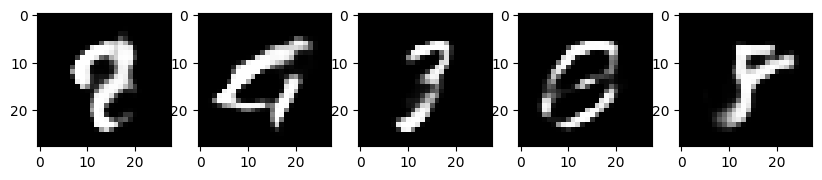

1/1 [==============================] - 0s 31ms/step


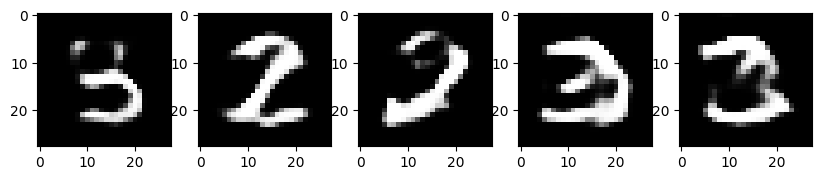

1/1 [==============================] - 0s 32ms/step


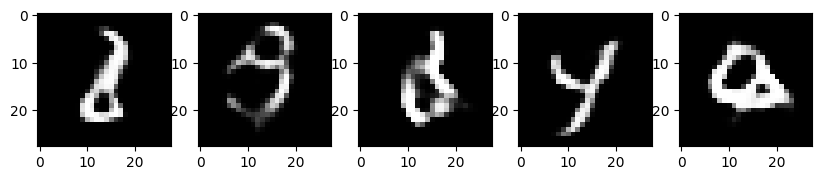

4/4 [==============================] - 0s 42ms/step


KeyboardInterrupt: 

In [9]:
def train_gan():
    for i in range(EPOCHS):
        real_images = np.reshape(
            data[np.random.choice(data.shape[0],
                                  BATCH_SIZE,
                                  replace=False)], (BATCH_SIZE,28,28,1))
        fake_images = generator.predict(
           np.random.uniform(-1.0, 1.0,
                             size=[BATCH_SIZE, Z_DIMENSIONS]))

        x = np.concatenate((real_images,fake_images))

        y = np.ones([2*BATCH_SIZE,1])
        y[BATCH_SIZE:,:] = 0

        discriminator.train_on_batch(x, y)
 
        noise = np.random.uniform(-1.0, 1.0, size=[BATCH_SIZE, Z_DIMENSIONS])
        y = np.ones([BATCH_SIZE,1])

        gan_model.train_on_batch(noise, y)
 
        if i%100 == 0:
           noise = np.random.uniform(-1.0, 1.0,
                                     size=[5, Z_DIMENSIONS])
           generated_image = generator.predict(noise)
           plt.figure(figsize=(10,10))
           for i in range(generated_image.shape[0]):
               plt.subplot(1, 5, i+1)
               plt.imshow(generated_image[i, :, :, 0],
                          cmap='gray')
           plt.show()
train_gan()